J'ai crée se notebook juste pour éviter les problèmes de merge avec git (les .ipynb merge tres mal :-/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

-----

In [2]:
# Synthetic data
N = 900
alpha = 100
beta = 10
gamma = 25
delta = 100
df = pd.DataFrame()
nb_comp =5
var = 20
targets = ['Set 1', 'Set 2', 'Set 3']
#df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 3, N)
df['age'] = np.round(np.random.uniform(0,100, N))
#df['age'] = np.round(np.random.normal(50, 2, N))
df['particle 1'] =  np.random.normal(10, var,N)
df['particle 2'] =  np.hstack([np.random.normal(10, var,N//2), np.random.normal(50, var,N//2)])
df['desease 1'] = df['particle 1']*alpha + beta*df['age']
df['disease 2'] = df['particle 2']*gamma 



print('Synthetic data')
display(df)

# Standardizse the features
df_norm = (df-df.mean())/df.std()
print('Normalized data')
display(df_norm)


# Apply PCA
pca = decomposition.PCA(n_components=nb_comp)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['pc #1', 'pc #2', 'pc #3', 'pc #4', 'pc #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)
display(PCA_df)


# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)
PCA_df

Synthetic data


,age,particle 1,particle 2,desease 1,disease 2
0,94.0,-13.543544,19.617240,-414.354355,490.431006
1,53.0,14.358093,21.936796,1965.809312,548.419889
2,98.0,9.219066,28.495963,1901.906571,712.399085
3,20.0,-14.225723,18.453180,-1222.572341,461.329494
4,17.0,-2.827017,-17.889764,-112.701742,-447.244091
...,...,...,...,...,...
895,50.0,29.649907,86.974997,3464.990678,2174.374917
896,22.0,-12.182185,62.240988,-998.218543,1556.024706
897,12.0,40.782402,40.975227,4198.240180,1024.380677
898,35.0,0.619334,66.447775,411.933437,1661.194378


Normalized data


,age,particle 1,particle 2,desease 1,disease 2
0,1.515097,-1.129817,-0.366037,-0.896285,-0.366037
1,0.128547,0.241143,-0.282026,0.255993,-0.282026
2,1.650370,-0.011366,-0.044461,0.225056,-0.044461
3,-0.987456,-1.163336,-0.408198,-1.287558,-0.408198
4,-1.088911,-0.603255,-1.724494,-0.750250,-1.724494
...,...,...,...,...,...
895,0.027092,0.992513,2.073577,0.981772,2.073577
896,-0.919820,-1.062926,1.177742,-1.178944,1.177742
897,-1.258003,1.539513,0.407523,1.336751,0.407523
898,-0.480182,-0.433917,1.330107,-0.496265,1.330107


After PCA
Singular values: [4.37889590e+01 4.10949080e+01 2.98116689e+01 1.16916650e-14
 3.55054819e-15]


,pc #1,pc #2,pc #3,pc #4,pc #5
0,-1.193632,0.500743,1.722730,-8.371046e-16,6.956761e-16
1,-0.011190,-0.539398,0.090599,3.124772e-16,1.193728e-15
2,0.263299,-0.274402,1.622908,1.104628e-14,-3.829465e-17
3,-1.750942,0.854386,-0.723673,1.910552e-17,-6.814785e-17
4,-2.502365,-1.013629,-0.878070,1.319074e-17,1.080601e-16
...,...,...,...,...,...
895,3.028122,1.146720,-0.254258,2.028177e-16,1.199169e-16
896,-0.082890,2.362394,-0.743077,-1.340248e-16,9.573908e-17
897,1.692520,-0.892593,-1.552539,-4.415588e-17,1.901609e-16
898,0.778650,1.844550,-0.441416,-2.391074e-17,1.246237e-17


,pc #1,pc #2,pc #3,pc #4,pc #5,label
0,-1.193632,0.500743,1.722730,-8.371046e-16,6.956761e-16,0.0
1,-0.011190,-0.539398,0.090599,3.124772e-16,1.193728e-15,0.0
2,0.263299,-0.274402,1.622908,1.104628e-14,-3.829465e-17,0.0
3,-1.750942,0.854386,-0.723673,1.910552e-17,-6.814785e-17,0.0
4,-2.502365,-1.013629,-0.878070,1.319074e-17,1.080601e-16,0.0
...,...,...,...,...,...,...
895,3.028122,1.146720,-0.254258,2.028177e-16,1.199169e-16,1.0
896,-0.082890,2.362394,-0.743077,-1.340248e-16,9.573908e-17,1.0
897,1.692520,-0.892593,-1.552539,-4.415588e-17,1.901609e-16,1.0
898,0.778650,1.844550,-0.441416,-2.391074e-17,1.246237e-17,1.0


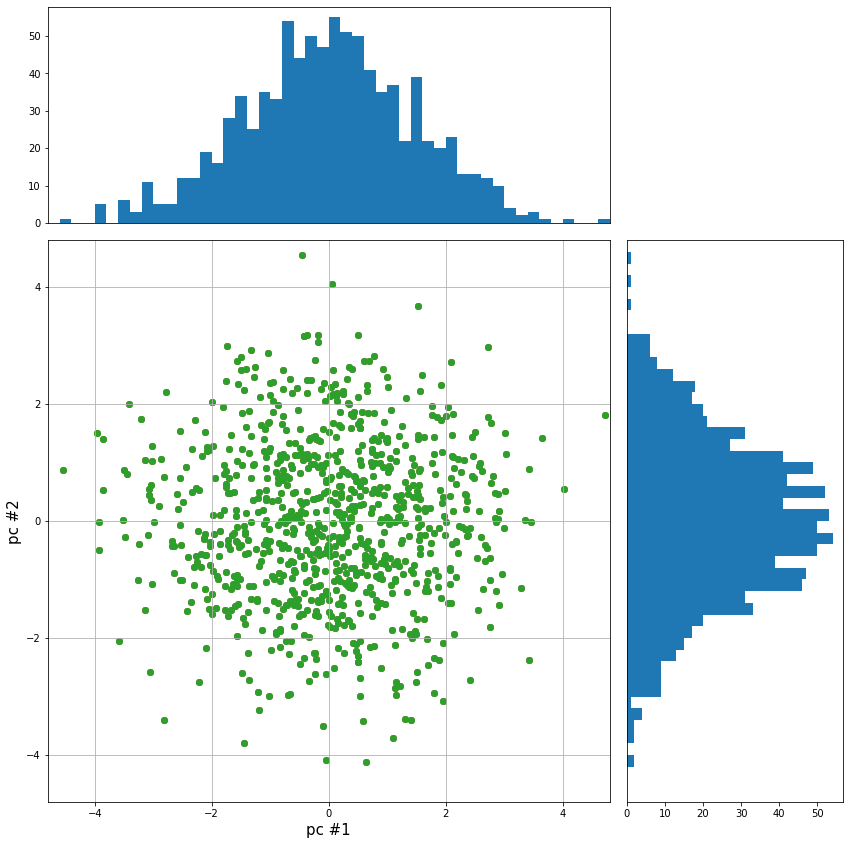

In [3]:
x = PCA_df.iloc[:,0]
y = PCA_df.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:

# the scatter plot:
for idt, _ in enumerate(targets):
     axScatter.scatter(x, y)
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])


axScatter.grid()
axScatter.set_xlabel('pc #1', fontsize = 15)
axScatter.set_ylabel('pc #2', fontsize = 15)
plt.savefig('./figures/synthetic_PCA12.png')
plt.show()

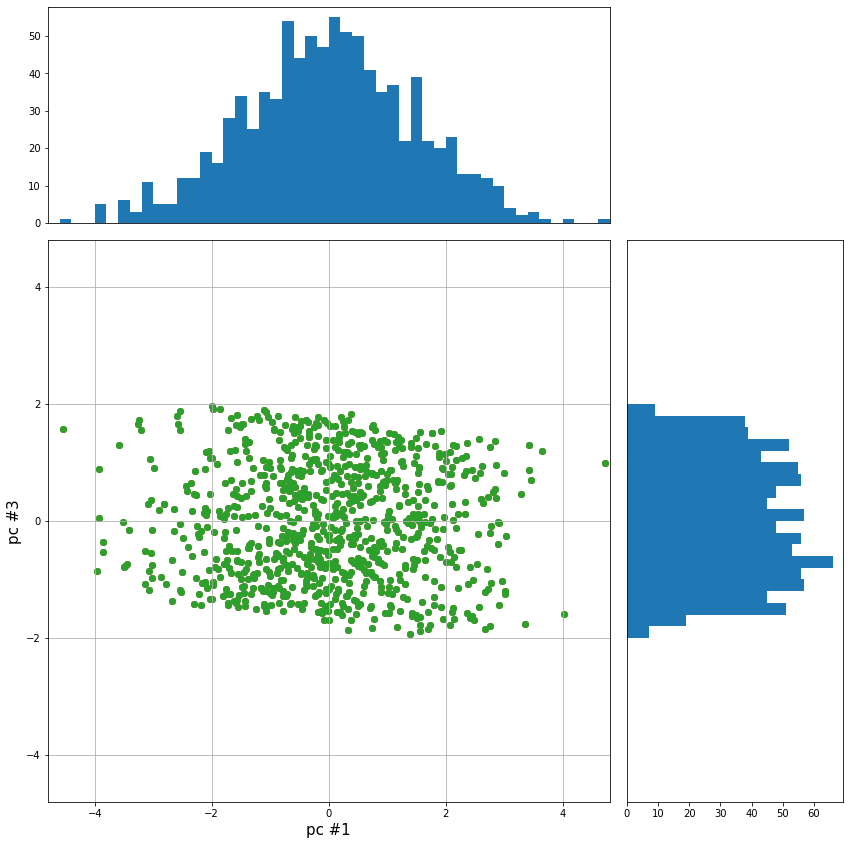

In [4]:
x = PCA_df.iloc[:,0]
y = PCA_df.iloc[:,2]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:

# the scatter plot:
for idt, _ in enumerate(targets):
     axScatter.scatter(x, y)
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])


axScatter.grid()
axScatter.set_xlabel('pc #1', fontsize = 15)
axScatter.set_ylabel('pc #3', fontsize = 15)
plt.savefig('./figures/synthetic_PCA13.png')
plt.show()

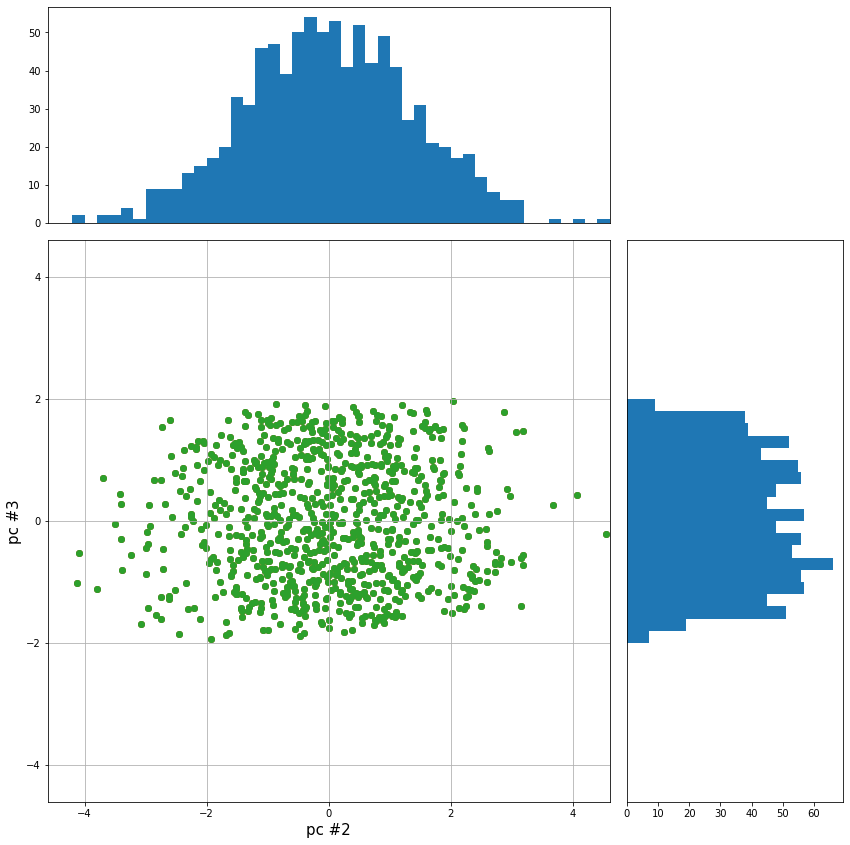

In [5]:
x = PCA_df.iloc[:,1]
y = PCA_df.iloc[:,2]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
     axScatter.scatter(x, y)
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])


axScatter.grid()
axScatter.set_xlabel('pc #2', fontsize = 15)
axScatter.set_ylabel('pc #3', fontsize = 15)
plt.savefig('./figures/synthetic_PCA23.png')
plt.show()

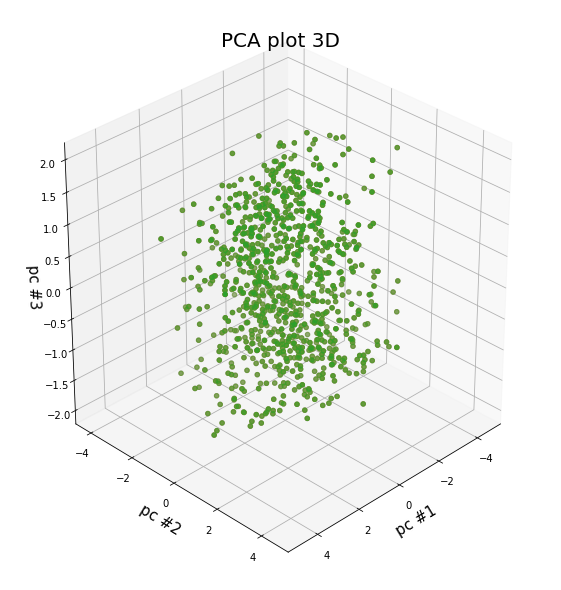

In [6]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=45)

for idt, _ in enumerate(targets):
    ax.scatter(PCA_df.iloc[:,0], 
               PCA_df.iloc[:,1],
               PCA_df.iloc[:,2])

ax.grid()
ax.set_xlabel(PCA_df.columns[0], fontsize = 15)
ax.set_ylabel(PCA_df.columns[1], fontsize = 15)
ax.set_zlabel(PCA_df.columns[2], fontsize = 15)
ax.set_title('PCA plot 3D', fontsize = 20)
plt.savefig('./figures/synthetic_PCA3d.png')
plt.show()

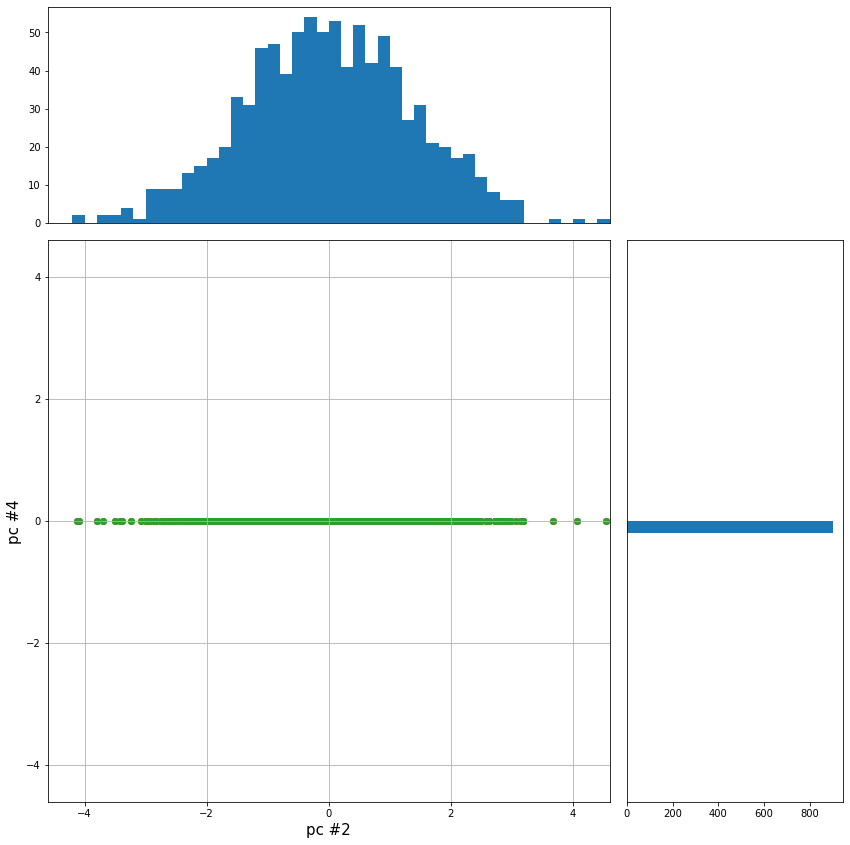

In [7]:
x = PCA_df.iloc[:,1]
y = PCA_df.iloc[:,3]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
     axScatter.scatter(x, y)
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])


axScatter.grid()
axScatter.set_xlabel('pc #2', fontsize = 15)
axScatter.set_ylabel('pc #4', fontsize = 15)

plt.show()

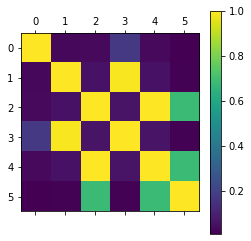

In [8]:
corrMatrix = df.iloc[:,:].corr()
cax = plt.matshow(corrMatrix)
plt.colorbar(cax)
plt.show()

-----
**Assignment #1: Report on the test of the tool on simulated and real dataThe  report  presents  the  assigned  tool  and  its  advantages,  disadvantages,  and  limitations,  bothin  a  theoretical  as  well  as  numerical  way  with  examples  using  synthetic  data  (to  show  specificcharacteristics) and real one.**

## Limitations
#### Non linearity

In [9]:
# Synthetic data
N = 900
df = pd.DataFrame()

df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 7, N)
df['particle 1'] =  np.random.normal(10, 7,N)
df['particle 2'] =  np.hstack([np.random.normal(30, 7,N//2), np.random.normal(10, 7,N//2)])
df['death'] = np.cos(df['particle 1']**2*100 + 10*df['age'])
df['other'] = df['particle 2']*25


print('Synthetic data')
display(df)

# Standardizse the features
df_norm = (df-df.mean())/df.std()


# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)

# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)


Synthetic data


,age,particle 1,particle 2,death,other
0,14.780428,3.635520,33.304965,0.724342,832.624118
1,22.130836,9.284698,32.663906,0.141984,816.597641
2,20.026693,1.085159,20.385771,-0.749804,509.644272
3,17.015551,10.244451,34.327112,-0.781336,858.177792
4,13.077600,11.382327,18.659535,0.207916,466.488380
...,...,...,...,...,...
895,101.972310,9.097054,13.408093,-0.819682,335.202322
896,114.462674,7.298024,15.629784,0.591252,390.744598
897,107.618503,20.388874,8.569815,-0.950737,214.245378
898,119.384197,16.370976,11.723388,-0.999982,293.084708


After PCA
Singular values: [4.81728907e+01 3.00391712e+01 2.98388588e+01 1.95362048e+01
 5.89966216e-15]


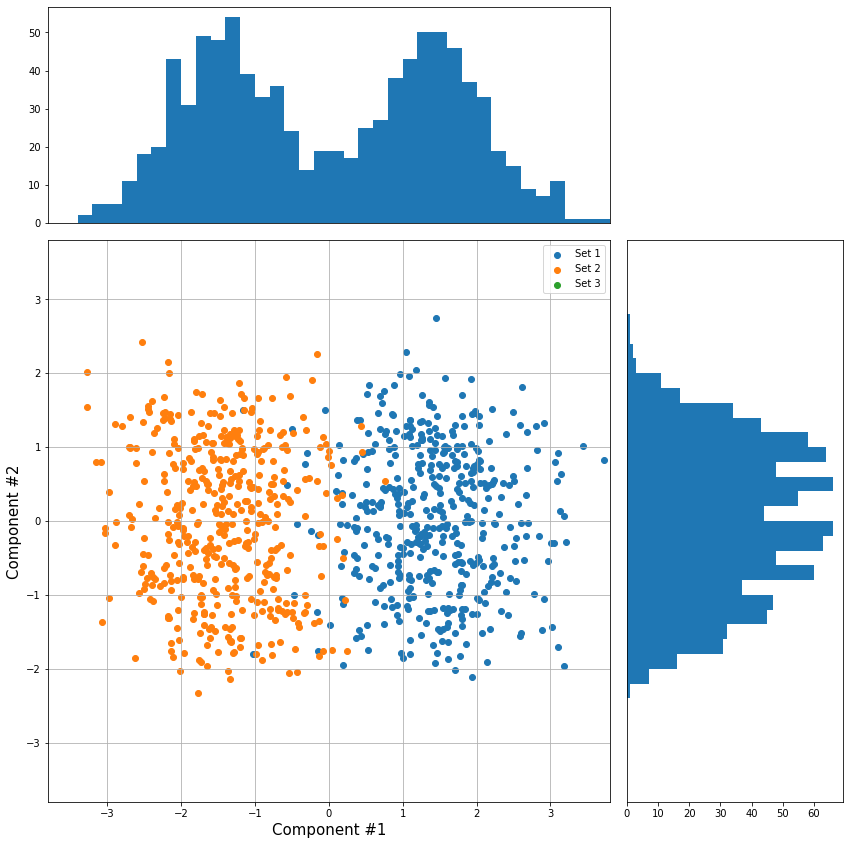

In [10]:
x = PCA_df.iloc[:,0]
y = PCA_df.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(PCA_df[PCA_df['label'] == idt].iloc[:,0], 
               PCA_df[PCA_df['label'] == idt].iloc[:,1])
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

axScatter.legend(targets)
axScatter.grid()
axScatter.set_xlabel('Component #1', fontsize = 15)
axScatter.set_ylabel('Component #2', fontsize = 15)
plt.savefig('./figures/synthetic_PCA_limitation.png')
plt.show()

#### Higher dimensionality

In [11]:
# Synthetic data
N = 900
df = pd.DataFrame()

df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 7, N)
df['particle 1'] =  np.random.normal(10, 7,N)
df['particle 2'] =  np.random.normal(10, 7,N)
df['death'] = np.random.normal(10, 7,N) + df['particle 1']
df['other'] = np.random.normal(10, 7,N) + df['particle 2']


print('Synthetic data')
display(df)

# Standardizse the features
df_norm = (df-df.mean())/df.std()


# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)

# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)

Synthetic data


,age,particle 1,particle 2,death,other
0,20.684289,9.870972,11.242530,25.250208,16.342387
1,17.574776,11.776064,-4.240892,30.783659,6.315089
2,34.688215,7.497417,10.707606,12.274933,20.654265
3,11.181669,1.285109,6.528084,18.949447,20.023236
4,15.407860,18.126547,19.468776,41.318163,33.148246
...,...,...,...,...,...
895,94.748903,1.093149,11.791109,13.913428,27.099973
896,111.250448,9.523443,8.015617,17.080463,9.662993
897,100.399815,4.649596,9.398540,15.217164,11.463045
898,96.145549,9.050671,9.580952,8.819176,16.717702


After PCA
Singular values: [40.67476171 37.70998936 29.85745643 16.91790787 15.5189288 ]


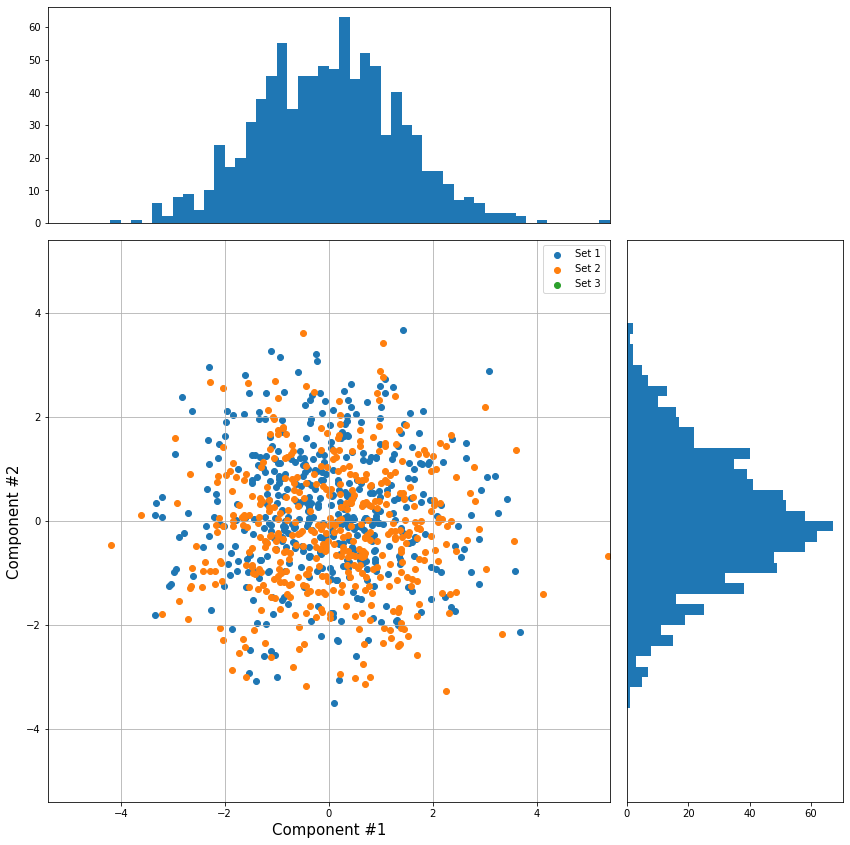

In [12]:
x = PCA_df.iloc[:,0]
y = PCA_df.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(PCA_df[PCA_df['label'] == idt].iloc[:,0], 
               PCA_df[PCA_df['label'] == idt].iloc[:,1])
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

axScatter.legend(targets)
axScatter.grid()
axScatter.set_xlabel('Component #1', fontsize = 15)
axScatter.set_ylabel('Component #2', fontsize = 15)
plt.savefig('./figures/synthetic_PCA_limitation_2.png')
plt.show()

-----
# Pour les particules:

In [13]:
df_particles = pd.read_csv('./data/Spain/Particles/data.csv')  

# We can make a tuple of the Lat and Long to store it instead of merging with the city just yet
df_particles['lat_long'] = df_particles[['SamplingPoint_Latitude','SamplingPoint_Longitude']].apply(tuple, axis=1)
df_particles

,CountryOrTerritory,ReportingYear,UpdateTime,StationLocalId,SamplingPointLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,Pollutant,AggregationType,Namespace,Unit,BeginPosition,EndPosition,Validity,Verification,DataCoverage,DataCapture,TimeCoverage,AQValue,lat_long
0,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,95.195811,100.0,95.195811,44.284621,"(43.14406999999999, -2.96337)"
1,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1635A,SP_03014006_14_6,38.359444,-0.471944,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,97.131148,100.0,97.131148,74.287389,"(38.35944444, -0.4719444400000001)"
2,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1781A,SP_11020004_14_6,36.688550,-6.117240,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,98.178506,100.0,98.178506,80.115028,"(36.68854999999999, -6.117240000000001)"
3,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1838A,SP_28009001_14_6,40.599700,-3.503300,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,98.884335,100.0,98.884335,82.812111,"(40.5997, -3.5033)"
4,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1422A,SP_28079035_14_6,40.419167,-3.703333,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,95.833333,100.0,95.833333,54.003196,"(40.41916666, -3.70333333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220489,Spain,2015,2019-02-21T23:02:29.616666Z,STA_ES1654A,SP_41088001_9_M,37.994350,-5.666870,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ug.m-3,2015-01-01,2016-01-01,Not valid,Verified,48.767123,100.0,48.767123,9.000000,"(37.99434999999999, -5.66687)"
220490,Spain,2015,2019-02-21T23:02:29.616666Z,STA_ES1713A,SP_48020003_9_M,43.254900,-2.902300,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ug.m-3,2015-01-01,2016-01-01,Not valid,Verified,42.191781,100.0,42.191781,9.000000,"(43.2549, -2.9023)"
220491,Spain,2015,2019-02-21T23:02:29.616666Z,STA_ES0001R,SP_45153999_64_M,39.546940,-4.350560,"Benzo(b,j)fluoranthene in PM10 (aerosol)",1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ng.m-3,2015-01-01,2016-01-01,Not valid,Verified,41.643836,100.0,41.643836,0.050000,"(39.54693999999999, -4.35056)"
220492,Spain,2015,2019-02-21T23:02:29.616666Z,STA_ES0008R,SP_33036999_64_M,43.439170,-4.850000,"Benzo(b,j)fluoranthene in PM10 (aerosol)",1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ng.m-3,2015-01-01,2016-01-01,Not valid,Verified,34.520548,100.0,34.520548,0.190000,"(43.43916999999999, -4.8500000000000005)"


In [14]:
# We have several years which makes duplicated lines with different AQ values
# We can take the mean to aggregate the values for several years
gla_df = df_particles.groupby(['lat_long', 'Pollutant'], as_index=False).agg({'AQValue': 'mean'})#, 'min', 'max']})
gla_df = gla_df.drop_duplicates()
gla_df

,lat_long,Pollutant,AQValue
0,"(27.76365199999999, -15.563851)",Nitrogen dioxide (air),31.929885
1,"(27.76365199999999, -15.563851)",Nitrogen monoxide (air),46.041240
2,"(27.76365199999999, -15.563851)",Nitrogen oxides (air),103.403837
3,"(27.76365199999999, -15.563851)",Ozone (air),600.122104
4,"(27.76365199999999, -15.563851)",Particulate matter < 10 µm (aerosol),98.921208
...,...,...,...
5978,"(43.686269, -7.507778000000001)",Nitrogen monoxide (air),29.848979
5979,"(43.686269, -7.507778000000001)",Nitrogen oxides (air),61.446906
5980,"(43.686269, -7.507778000000001)",Ozone (air),499.796260
5981,"(43.686269, -7.507778000000001)",Particulate matter < 10 µm (aerosol),29.056783


In [15]:
# Unfortunatly we have a lot of pollutant mess, let us concentrate only on 10 of them for example
pollutant_lst = gla_df['Pollutant'].value_counts().nlargest(10)
pollutant_lst

Nitrogen dioxide (air)                   543
Nitrogen monoxide (air)                  542
Nitrogen oxides (air)                    540
Particulate matter < 10 µm (aerosol)     529
Sulphur dioxide (air)                    475
Ozone (air)                              466
Carbon monoxide (air)                    284
Particulate matter < 2.5 µm (aerosol)    267
Cadmium in PM10 (aerosol)                173
Arsenic in PM10 (aerosol)                173
Name: Pollutant, dtype: int64

In [16]:
# We get only the rows that are in the pollutant list
# We went from 5983 to 3992 rows :-/
gla_df = gla_df[gla_df['Pollutant'].isin(pollutant_lst.index)]
gla_df

,lat_long,Pollutant,AQValue
0,"(27.76365199999999, -15.563851)",Nitrogen dioxide (air),31.929885
1,"(27.76365199999999, -15.563851)",Nitrogen monoxide (air),46.041240
2,"(27.76365199999999, -15.563851)",Nitrogen oxides (air),103.403837
3,"(27.76365199999999, -15.563851)",Ozone (air),600.122104
4,"(27.76365199999999, -15.563851)",Particulate matter < 10 µm (aerosol),98.921208
...,...,...,...
5978,"(43.686269, -7.507778000000001)",Nitrogen monoxide (air),29.848979
5979,"(43.686269, -7.507778000000001)",Nitrogen oxides (air),61.446906
5980,"(43.686269, -7.507778000000001)",Ozone (air),499.796260
5981,"(43.686269, -7.507778000000001)",Particulate matter < 10 µm (aerosol),29.056783


In [17]:
final_df = gla_df.pivot(index='lat_long', columns='Pollutant', values='AQValue')
final_df

Pollutant,Arsenic in PM10 (aerosol),Cadmium in PM10 (aerosol),Carbon monoxide (air),Nitrogen dioxide (air),Nitrogen monoxide (air),Nitrogen oxides (air),Ozone (air),Particulate matter < 10 µm (aerosol),Particulate matter < 2.5 µm (aerosol),Sulphur dioxide (air)
lat_long,,,,,,,,,,
"(27.76365199999999, -15.563851)",NaN,NaN,NaN,31.929885,46.041240,103.403837,600.122104,98.921208,50.261435,7.779282
"(27.772597359999992, -15.541880430000004)",NaN,NaN,NaN,28.457878,33.340514,79.478789,738.639295,94.007336,42.013627,4.243715
"(27.80127799999999, -15.461157)",NaN,NaN,0.155207,20.796244,14.876612,39.473599,1754.814896,85.045869,34.437784,4.083601
"(27.831765999999984, -17.921671)",NaN,NaN,NaN,NaN,NaN,NaN,1651.722701,131.389805,NaN,9.109979
"(27.86907, -15.38715)",NaN,NaN,NaN,16.596762,11.998870,30.508680,1506.541722,87.744303,35.123872,7.675901
...,...,...,...,...,...,...,...,...,...,...
"(43.5705, -5.9583)",NaN,NaN,0.687276,22.128702,36.435864,72.534625,237.961120,48.354297,23.770220,NaN
"(43.5792, -5.9273)",NaN,NaN,0.773120,44.758923,117.241705,225.786428,147.945248,153.581906,NaN,73.307003
"(43.6694, -7.3789)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.847705,20.770787


In [18]:
# Then merge back with help of lat_long but,
# be careful that we introduce duplicates in the pollutants values ( can easily be discarded )
foo_df = pd.merge(df_particles, final_df, left_on='lat_long', right_on='lat_long')
foo_df

,CountryOrTerritory,ReportingYear,UpdateTime,StationLocalId,SamplingPointLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,Pollutant,AggregationType,Namespace,...,Arsenic in PM10 (aerosol),Cadmium in PM10 (aerosol),Carbon monoxide (air),Nitrogen dioxide (air),Nitrogen monoxide (air),Nitrogen oxides (air),Ozone (air),Particulate matter < 10 µm (aerosol),Particulate matter < 2.5 µm (aerosol),Sulphur dioxide (air)
0,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,NaN,0.64124,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
1,Spain,2015,2019-02-21T23:33:40.13Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,NaN,0.64124,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
2,Spain,2016,2019-02-21T23:33:40.13Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,NaN,0.64124,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
3,Spain,2014,2019-02-21T23:46:43.556666Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),AOT40 vegetation protection,ES.BDCA.AQD,...,NaN,NaN,0.64124,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
4,Spain,2011,2019-02-21T23:46:43.556666Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),AOT40 vegetation protection,ES.BDCA.AQD,...,NaN,NaN,0.64124,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220473,Spain,2012,2019-02-21T23:02:29.616666Z,STA_ES1893A,SP_28079044_9_M,40.490833,-3.721111,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.101336,NaN
220474,Spain,2014,2019-02-21T23:02:29.616666Z,STA_ES1893A,SP_28079044_9_M,40.490833,-3.721111,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.101336,NaN
220475,Spain,2013,2019-02-21T23:02:29.616666Z,STA_ES1893A,SP_28079044_9_M,40.490833,-3.721111,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.101336,NaN
220476,Spain,2017,2019-07-18T14:54:28.796666Z,STA_ES1893A,SP_28079044_9_M,40.490833,-3.721111,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.101336,NaN


In [19]:
# Get back the useful info
index_lst = foo_df[['SamplingPoint_Latitude', 'SamplingPoint_Longitude']].drop_duplicates().index.values
print("First 10 non duplicate coordinates:", index_lst[:10])
foo_df.iloc[index_lst]

# Alors au final on a bien les 655 coordonnées d'avant qui sont les 655 places ou on a relevé au moin
# un des 10 polluants de la liste principale
# J'espère que ca aidera ;-) et j'espère que c'est pas n'importe quoi ce que j'ai fait xD
# Mais 655 villes/positions ca me semble pas mal je penses

First 10 non duplicate coordinates: [   0  415 1176 1584 1924 2304 2569 3005 3458 3820]


,CountryOrTerritory,ReportingYear,UpdateTime,StationLocalId,SamplingPointLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,Pollutant,AggregationType,Namespace,...,Arsenic in PM10 (aerosol),Cadmium in PM10 (aerosol),Carbon monoxide (air),Nitrogen dioxide (air),Nitrogen monoxide (air),Nitrogen oxides (air),Ozone (air),Particulate matter < 10 µm (aerosol),Particulate matter < 2.5 µm (aerosol),Sulphur dioxide (air)
0,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,NaN,0.641240,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
415,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1635A,SP_03014006_14_6,38.359444,-0.471944,Ozone (air),Summer mean,ES.BDCA.AQD,...,1.200297,0.116996,0.440230,48.742742,94.408738,192.778890,3297.864069,27.511125,NaN,5.132375
1176,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1781A,SP_11020004_14_6,36.688550,-6.117240,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,NaN,0.652394,35.514465,69.569465,140.174074,6653.664333,42.722351,NaN,7.473219
1584,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1838A,SP_28009001_14_6,40.599700,-3.503300,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,NaN,0.434674,38.940881,32.952192,85.415934,8288.928348,34.873182,28.238964,NaN
1924,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1422A,SP_28079035_14_6,40.419167,-3.703333,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,NaN,0.780421,61.711919,123.598114,256.739986,3961.805346,NaN,NaN,14.429464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220310,Spain,2014,2019-02-21T22:44:42.34Z,STA_ES1839A,SP_08051003_10_M,41.617900,2.087100,Particulate matter < 10 µm (aerosol),1 year day exceed 50,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.132734,NaN,NaN
220366,Spain,2014,2019-02-21T22:44:42.34Z,STA_ES1872A,SP_08187014_10_M,41.548225,2.105157,Particulate matter < 10 µm (aerosol),1 year day exceed 50,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.284648,NaN,NaN
220398,Spain,2017,2019-07-18T14:54:50Z,STA_ES2079A,SP_08279014_10_M,41.600000,2.000000,Particulate matter < 10 µm (aerosol),1 year 90.41 percentile,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.997228,NaN,NaN
220414,Spain,2016,2019-02-21T23:20:53.58Z,STA_ES1994A,SP_07040005_9_M,39.573130,2.646460,Particulate matter < 2.5 µm (aerosol),1 year day min,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.006206,NaN
